In [2]:
import pandas as pd
import xlrd
=
data = pd.read_excel(r'C:\Users\THINKPAD\Desktop\case study\Retailoverse - IG Program.xlsx', 1)
data["Total"] = data["Price"] * data["Delivered Quantity"]
data

,Order Date,Order ID,Type,Item,Price,Ordered Quantity,Delivered Quantity,Customer ID,Customer Latitude,Customer Longitude,Order Payment Type,Total
0,2022-01-01,858994,Unassisted,MilkPak 250ml x27,1093,2,1,10709,24.798781,67.262223,Cash,1093
1,2022-01-01,857008,Assisted,Brite 35gm x12,110,1,0,34971,24.945218,67.365531,Credit,0
2,2022-01-01,857808,Assisted,Tapal Family Mixture 20gm x20,352,2,2,31996,24.844027,67.115454,Credit,704
3,2022-01-01,856736,Assisted,Everyday 15gm x12,148,1,0,12809,24.866806,67.292121,Cash,0
4,2022-01-01,857731,Unassisted,Mezan Canola Oil 1Ltr x5,1523,3,3,11119,24.965959,67.342092,Cash,4569
...,...,...,...,...,...,...,...,...,...,...,...,...
38532,2022-01-14,775550,Unassisted,Olper's Milk 1Ltr x12 Promo,1703,5,3,35467,24.892052,67.017424,Cash,5109
38533,2022-01-14,775568,Unassisted,MilkPak 250ml x27,1124,1,1,22264,24.949519,67.123177,Credit,1124
38534,2022-01-14,775818,Unassisted,Tapal Tezdum 11gm x10,77,14,13,49858,24.915486,67.299089,Credit,1001
38535,2022-01-14,775818,Unassisted,Bunyad 26gm x12,209,1,1,49858,24.964695,67.234542,Credit,209


In [3]:
cat = pd.read_excel(r'C:\Users\THINKPAD\Desktop\case study\Retailoverse - IG Program.xlsx', 2)
margin = pd.read_excel(r'C:\Users\THINKPAD\Desktop\case study\Retailoverse - IG Program.xlsx', 3)
cat

,Item,Category
0,Everyday 15gm x12,Milk
1,MilkPak 250ml x27,Milk
2,Tapal Danedar 95gm x1,Tea
3,Bunyad 26gm x12,Milk
4,Cerelac 3 Fruits 25gm x8,Baby Food
5,Tapal Tezdum 11gm x10,Tea
6,Shan Korma 25gm x12,Recipes
7,Shan Bombay Biryani 25gm x12,Recipes
8,Cerelac Wheat 25gm x8,Baby Food
9,Ariel Original 35gm x12,Detergent


In [4]:
m = pd.merge(left=data, right=cat, how='outer', left_on='Item', right_on='Item')
com = m[['Order ID','Category', 'Total']]
com.groupby(['Category']).sum()


,Order ID,Total
Category,,
Baby Care,506410664,1104906
Baby Food,3419488348,4267421
Detergent,2673307399,1978680
Juices,3081251967,5734543
Milk,10665929496,37865066
Oil,1673164922,12599069
Recipes,5673865535,10145297
Staples,525774846,33766106
Tea,3740594428,4551256


In [5]:
com = pd.merge(left=com, right=margin, how='outer', left_on='Category', right_on='Category')
com



,Order ID,Category,Total,Gross Margin
0,858994,Milk,1093,0.04
1,857808,Milk,2024,0.04
2,856736,Milk,1008,0.04
3,857254,Milk,1004,0.04
4,858502,Milk,961,0.04
...,...,...,...,...
38532,909247,Baby Care,732,0.09
38533,862905,Baby Care,625,0.09
38534,775291,Baby Care,716,0.09
38535,909442,Baby Care,700,0.09


In [6]:
com['commission'] = com['Total'] * com['Gross Margin'] 
com
costs = com.copy()


In [7]:

com = com[['Category','commission']]
com

,Category,commission
0,Milk,43.72
1,Milk,80.96
2,Milk,40.32
3,Milk,40.16
4,Milk,38.44
...,...,...
38532,Baby Care,65.88
38533,Baby Care,56.25
38534,Baby Care,64.44
38535,Baby Care,63.00


In [8]:
new = m[['Category', 'Ordered Quantity']]
new

,Category,Ordered Quantity
0,Milk,2
1,Milk,2
2,Milk,1
3,Milk,1
4,Milk,1
...,...,...
38532,Milk,5
38533,Milk,13
38534,Milk,2
38535,Milk,4


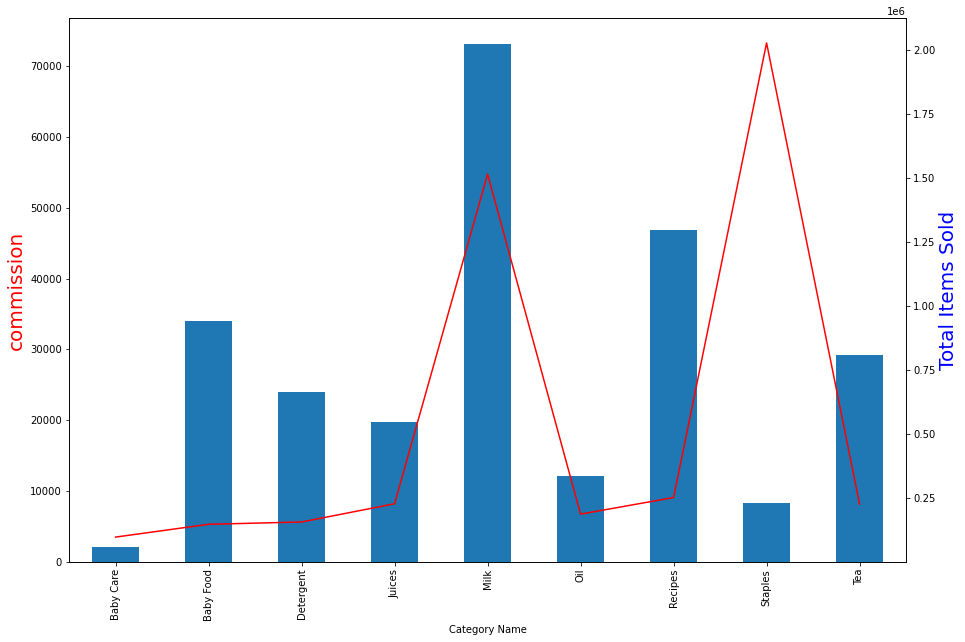

In [9]:
import matplotlib.pyplot as plt
# g = com.groupby('Category')['commission'].sum().sort_values(ascending=False)
# print(g)

# f = com.groupby('Category')['commission'].sum().sort_values(ascending=False)
# print(f)
fig = plt.subplots(figsize=(15, 10))


ax1 = new.groupby('Category')['Ordered Quantity'].sum().plot(kind="bar")
ax2 = ax1.twinx()
ax2 = com.groupby('Category')['commission'].sum().plot(kind="line",color='r')
 

ax1.set_xlabel('Category Name')
ax1.set_ylabel('commission', color='r', fontsize=20)
ax2.set_ylabel('Total Items Sold', color='b', fontsize=20)

plt.show()

In [10]:
g = com.groupby('Category')['commission'].sum().sort_values(ascending=False)
print(g)

Category
Staples      2025966.360
Milk         1514602.640
Recipes       253632.425
Juices        229381.720
Tea           227562.800
Oil           188986.035
Detergent     158294.400
Baby Food     149359.735
Baby Care      99441.540
Name: commission, dtype: float64


In [11]:
d = new.groupby('Category')['Ordered Quantity'].sum().sort_values(ascending=False)
print(d)

Category
Milk         73113
Recipes      46919
Baby Food    33955
Tea          29210
Detergent    23916
Juices       19788
Oil          12074
Staples       8262
Baby Care     2110
Name: Ordered Quantity, dtype: int64


In [12]:
data['weekday'] = data['Order Date'].dt.day_name()
data

,Order Date,Order ID,Type,Item,Price,Ordered Quantity,Delivered Quantity,Customer ID,Customer Latitude,Customer Longitude,Order Payment Type,Total,weekday
0,2022-01-01,858994,Unassisted,MilkPak 250ml x27,1093,2,1,10709,24.798781,67.262223,Cash,1093,Saturday
1,2022-01-01,857008,Assisted,Brite 35gm x12,110,1,0,34971,24.945218,67.365531,Credit,0,Saturday
2,2022-01-01,857808,Assisted,Tapal Family Mixture 20gm x20,352,2,2,31996,24.844027,67.115454,Credit,704,Saturday
3,2022-01-01,856736,Assisted,Everyday 15gm x12,148,1,0,12809,24.866806,67.292121,Cash,0,Saturday
4,2022-01-01,857731,Unassisted,Mezan Canola Oil 1Ltr x5,1523,3,3,11119,24.965959,67.342092,Cash,4569,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38532,2022-01-14,775550,Unassisted,Olper's Milk 1Ltr x12 Promo,1703,5,3,35467,24.892052,67.017424,Cash,5109,Friday
38533,2022-01-14,775568,Unassisted,MilkPak 250ml x27,1124,1,1,22264,24.949519,67.123177,Credit,1124,Friday
38534,2022-01-14,775818,Unassisted,Tapal Tezdum 11gm x10,77,14,13,49858,24.915486,67.299089,Credit,1001,Friday
38535,2022-01-14,775818,Unassisted,Bunyad 26gm x12,209,1,1,49858,24.964695,67.234542,Credit,209,Friday


C:\Users\THINKPAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Daily Sales by Day of the Week'}, xlabel='weekday', ylabel='count'>

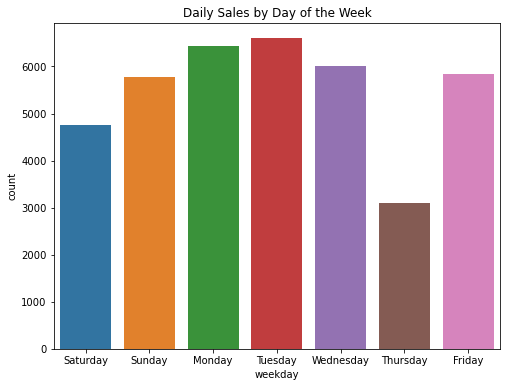

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.title('Daily Sales by Day of the Week')
sns.countplot(data['weekday'])

In [14]:
data.tail(10)

,Order Date,Order ID,Type,Item,Price,Ordered Quantity,Delivered Quantity,Customer ID,Customer Latitude,Customer Longitude,Order Payment Type,Total,weekday
38527,2022-01-14,775818,Unassisted,Shan Pilau Biryani 25gm x12,314,1,1,49858,24.848076,67.149256,Credit,314,Friday
38528,2022-01-14,775568,Unassisted,Olper's Milk 250ml x27,973,5,2,22264,24.887555,67.348113,Credit,1946,Friday
38529,2022-01-14,775549,Unassisted,Tapal Family Mixture 20gm x20,352,1,1,35467,24.959231,67.293149,Cash,352,Friday
38530,2022-01-14,775549,Unassisted,Olper's Milk 1Ltr x12 Promo,1629,1,1,35467,24.828518,67.200914,Cash,1629,Friday
38531,2022-01-14,775568,Unassisted,CupShup 225ml x27,677,5,4,22264,24.796583,67.155030,Credit,2708,Friday
38532,2022-01-14,775550,Unassisted,Olper's Milk 1Ltr x12 Promo,1703,5,3,35467,24.892052,67.017424,Cash,5109,Friday
38533,2022-01-14,775568,Unassisted,MilkPak 250ml x27,1124,1,1,22264,24.949519,67.123177,Credit,1124,Friday
38534,2022-01-14,775818,Unassisted,Tapal Tezdum 11gm x10,77,14,13,49858,24.915486,67.299089,Credit,1001,Friday
38535,2022-01-14,775818,Unassisted,Bunyad 26gm x12,209,1,1,49858,24.964695,67.234542,Credit,209,Friday
38536,2022-01-14,775818,Unassisted,Everyday 15gm x12,154,1,1,49858,24.818293,67.238516,Credit,154,Friday


C:\Users\THINKPAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

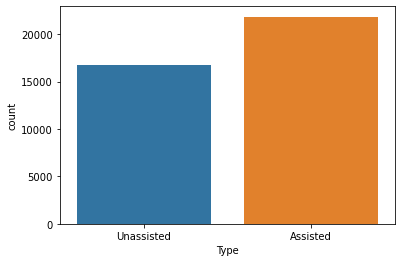

In [15]:
sns.countplot(data['Type'])

In [16]:
type_df = data[['Type','Order ID']].drop_duplicates()
type_df.groupby(['Type'])['Order ID'].count()

Type
Assisted      7854
Unassisted    5650
Name: Order ID, dtype: int64

16.321090047393366


C:\Users\THINKPAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

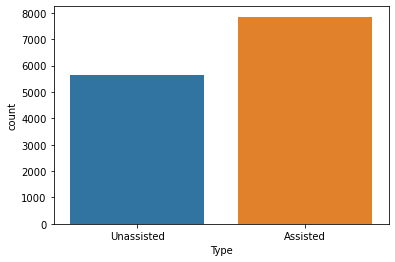

In [17]:
x = 0
x = ((7854-5650)/(7854+5650))*100
print(x)

sns.countplot(type_df['Type'])

In [18]:
data['Product_Bundle'] = data.groupby('Order ID')['Item'].transform(lambda x:','.join(x))
new_all = data.copy()
data.head()

,Order Date,Order ID,Type,Item,Price,Ordered Quantity,Delivered Quantity,Customer ID,Customer Latitude,Customer Longitude,Order Payment Type,Total,weekday,Product_Bundle
0,2022-01-01,858994,Unassisted,MilkPak 250ml x27,1093,2,1,10709,24.798781,67.262223,Cash,1093,Saturday,"MilkPak 250ml x27,MilkPak 1Ltr x12,Fruita Vita..."
1,2022-01-01,857008,Assisted,Brite 35gm x12,110,1,0,34971,24.945218,67.365531,Credit,0,Saturday,"Brite 35gm x12,Everyday 15gm x12"
2,2022-01-01,857808,Assisted,Tapal Family Mixture 20gm x20,352,2,2,31996,24.844027,67.115454,Credit,704,Saturday,"Tapal Family Mixture 20gm x20,CupShup 225ml x2..."
3,2022-01-01,856736,Assisted,Everyday 15gm x12,148,1,0,12809,24.866806,67.292121,Cash,0,Saturday,"Everyday 15gm x12,MilkPak 250ml x27,Tapal Dane..."
4,2022-01-01,857731,Unassisted,Mezan Canola Oil 1Ltr x5,1523,3,3,11119,24.965959,67.342092,Cash,4569,Saturday,"Mezan Canola Oil 1Ltr x5,Mezan Banaspati 1Kg x5"


In [19]:
new_all = new_all[['Order ID', 'Product_Bundle']].drop_duplicates()
new_all.tail()

,Order ID,Product_Bundle
38523,775534,"Tapal Tezdum 11gm x10,Tapal Danedar 95gm x1"
38527,775818,"Shan Pilau Biryani 25gm x12,Tapal Tezdum 11gm ..."
38528,775568,"Olper's Milk 250ml x27,CupShup 225ml x27,MilkP..."
38529,775549,"Tapal Family Mixture 20gm x20,Olper's Milk 1Lt..."
38532,775550,Olper's Milk 1Ltr x12 Promo


In [20]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in new_all['Product_Bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
    
top = count.most_common(10)
top

[(('Everyday 15gm x12', 'Bunyad 26gm x12'), 539),
 (('Bunyad 26gm x12', 'Everyday 15gm x12'), 529),
 (('Cerelac 3 Fruits 25gm x8', 'Everyday 15gm x12'), 493),
 (('Everyday 15gm x12', 'Cerelac 3 Fruits 25gm x8'), 480),
 (('Cerelac 3 Fruits 25gm x8', 'Bunyad 26gm x12'), 379),
 (('Shan Bombay Biryani 25gm x12', 'Shan Korma 25gm x12'), 372),
 (('Cerelac 3 Fruits 25gm x8', 'Cerelac Wheat 25gm x8'), 360),
 (('Shan Karahi 25gm x12', 'Shan Korma 25gm x12'), 360),
 (('Cerelac Wheat 25gm x8', 'Cerelac 3 Fruits 25gm x8'), 355),
 (('Bunyad 26gm x12', 'Cerelac 3 Fruits 25gm x8'), 345)]

[(('Everyday 15gm x12', 'Bunyad 26gm x12'), 539), (('Bunyad 26gm x12', 'Everyday 15gm x12'), 529), (('Cerelac 3 Fruits 25gm x8', 'Everyday 15gm x12'), 493), (('Everyday 15gm x12', 'Cerelac 3 Fruits 25gm x8'), 480), (('Cerelac 3 Fruits 25gm x8', 'Bunyad 26gm x12'), 379), (('Shan Bombay Biryani 25gm x12', 'Shan Korma 25gm x12'), 372), (('Cerelac 3 Fruits 25gm x8', 'Cerelac Wheat 25gm x8'), 360), (('Shan Karahi 25gm x12', 'Shan Korma 25gm x12'), 360), (('Cerelac Wheat 25gm x8', 'Cerelac 3 Fruits 25gm x8'), 355), (('Bunyad 26gm x12', 'Cerelac 3 Fruits 25gm x8'), 345)]
[539, 529, 493, 480, 379, 372, 360, 360, 355, 345]


([<matplotlib.patches.Wedge at 0x1ab88d42190>,
 [Text(1.0122986916889238, 0.4304083628426534, "(('Everyday 15gm x12', 'Bunyad 26gm x12'), 539)"),
  Text(0.40001964569389703, 1.0246874074852923, "(('Bunyad 26gm x12', 'Everyday 15gm x12'), 529)"),
  Text(-0.41829737674958445, 1.017362916861243, "(('Cerelac 3 Fruits 25gm x8', 'Everyday 15gm x12'), 493)"),
  Text(-0.988097308888029, 0.4833877410198101, "(('Everyday 15gm x12', 'Cerelac 3 Fruits 25gm x8'), 480)"),
  Text(-1.0810837098098893, -0.20312068428322905, "(('Cerelac 3 Fruits 25gm x8', 'Bunyad 26gm x12'), 379)"),
  Text(-0.8079496295133204, -0.74646995664212, "(('Shan Bombay Biryani 25gm x12', 'Shan Korma 25gm x12'), 372)"),
  Text(-0.30288557270366007, -1.0574782881213098, "(('Cerelac 3 Fruits 25gm x8', 'Cerelac Wheat 25gm x8'), 360)"),
  Text(0.2807365436270273, -1.0635727493088334, "(('Shan Karahi 25gm x12', 'Shan Korma 25gm x12'), 360)"),
  Text(0.7824448191927097, -0.7731624052671522, "(('Cerelac Wheat 25gm x8', 'Cerelac 3 Fruit

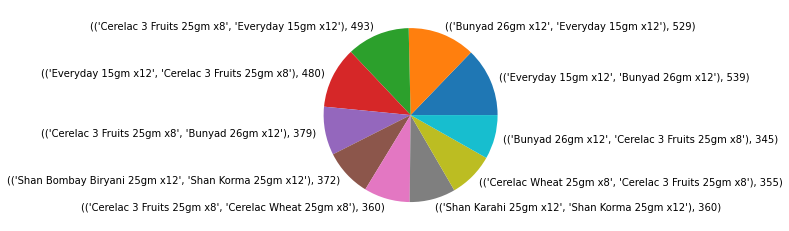

In [21]:
val = []
label = []

for i in top:
    label.append(i)
    val.append(i[1])
print(label)
print(val)
# y = np.array([35, 25, 25, 15])
# mylabels = ["Apples", "Bananas", "Cherries", "Dates"]

plt.pie(val, labels = label)

In [22]:
customer = data[['Order ID', 'Customer ID']]
customer


,Order ID,Customer ID
0,858994,10709
1,857008,34971
2,857808,31996
3,856736,12809
4,857731,11119
...,...,...
38532,775550,35467
38533,775568,22264
38534,775818,49858
38535,775818,49858


In [23]:
customer.drop_duplicates()
customer

,Order ID,Customer ID
0,858994,10709
1,857008,34971
2,857808,31996
3,856736,12809
4,857731,11119
...,...,...
38532,775550,35467
38533,775568,22264
38534,775818,49858
38535,775818,49858


In [24]:
newdf= customer.groupby(['Customer ID'])['Order ID'].count().sort_values(ascending=False)
newdf= newdf.to_frame()
newdf


,Order ID
Customer ID,
31948,99
18932,86
16445,74
47221,69
29149,67
...,...
43421,1
17418,1
43391,1



# Prompt 2 - Are delivery Charges needed?


In [25]:

costs
cost_sub = costs.groupby(['Order ID'])['commission'].sum().sort_values(ascending=False)
cost_sub= cost_sub.to_frame()
cost_sub

,commission
Order ID,
765182,1245322.32
756206,121605.12
763473,103109.04
873590,58527.44
911789,52738.56
...,...
747145,0.00
772056,0.00
867957,0.00


In [26]:
costs
cost_total = costs.groupby(['Order ID'])['Total'].sum().sort_values(ascending=False)
cost_total= cost_total.to_frame()
cost_total

,Total
Order ID,
765182,20755372
763473,2577423
756206,2026752
859296,1512252
873590,1463186
...,...
894231,0
894158,0
756471,0


In [27]:
avg = cost_sub['commission'].mean()
avg

358.9475455420623

In [29]:
num = avg * 20
num

7178.950910841246

In [31]:
num - 4000

3178.950910841246